Extra packages to be installed

* wordcloud
* stop_words

In [1]:
# import sys  
# reload(sys)  
# sys.setdefaultencoding('utf8')

# Introduction to Natural Language Processing

## What is NLP?

>Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.  -- Wikipedia 

We interact with technology every single day of our lives, but humans and computers communicate in fundamentally different ways.

languages like python, R, C etc. have well defined rules, where there can be only one meaning attached to a sentance.

However, the languages that humans speak are more unstructured, where a single word or phrase can mean differently in two different scenarios.

Most of the communication happens in such natural languages. Hence, to unlock any meaningful utilty where human language is associated, NLP is extremely important.

## Examples of NLP Applications

1. Machine Translation
- Search Engines
2. Spam Filters
- Summarization

## The Past, The Present, The Future

# The Usual Suspects in NLP Pipeline


## Supervised Machine Learning with Text


## The Bag of Words approach


## Reading Text in

# The Datasets

## Haptik Domain Classification

* The dataset contains two separate files for training and testing/evaluation of data.
* Each human query/message is categorized into single/multiple domains by human annotators.
    - *T*: message belongs to the corresponding class
    - *F*: message does not belong to the corresponding class (column heading represents the class name)

## Haptik Domain Classification

* Task: train a multi-label classifier to classify "message" into one or more classes/domains
* Suggested evaluation metrics
    - Precision
    - Recall
    - Accuracy per class
    - Overall Accuracy
    
NOTE:
* Please note that the messages are in raw format, it also contains system specific content which may not be important for identifying domain.
* It is important to preprocess messages and remove such information for better training.

In [10]:
import pandas as pd

train_haptik = pd.read_csv('../data/domain_classification/train_data.csv')
test_haptik = pd.read_csv('../data/domain_classification/test_data.csv')

## Exploring Haptik Data

In [3]:
train_haptik.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,7am everyday,F,F,F,T,F,F,F,F,F
1,chocolate cake,T,F,F,F,F,F,F,F,F
2,closed mortice and tenon joint door dimentions,F,F,T,F,F,F,F,F,F
3,train eppo kelambum,F,F,F,F,T,F,F,F,F
4,yesterday i have cancelled the flight ticket,F,F,F,F,T,F,F,F,F


## Exploring Haptik Data

In [4]:
test_haptik.head()

,message,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,Nearest metro station,F,F,F,F,F,T,F,F,F
1,Pick up n drop service trough cab,F,F,F,F,T,F,F,F,F
2,I wants to buy a bick,F,F,F,F,F,F,F,F,T
3,Show me pizza,T,F,F,F,F,F,F,F,F
4,What is the cheapest package to andaman and ni...,F,F,F,F,T,F,F,F,F


## The 20 Newsgroups dataset

* [Official Website](http://qwone.com/~jason/20Newsgroups/)
* The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.
* The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

## The 20 Newsgroups dataset

* In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn.
* In order to get faster execution times, we will work on a partial dataset with only 4 categories out of the 20 available in the dataset.

In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## The 20 Newsgroups dataset

The returned dataset is a scikit-learn “bunch”:

* a simple holder object with fields that can be both accessed as python dict keys or object attributes for convenience
* for instance, the *target_names* holds the list of the requested category names:

In [6]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

# Haptik Domain Classification

## Agenda

* Tokenization
* Stop-word Removal
* Stemming
* Word Cloud
* TF-IDF

## Constructing the Datasets

It would be desiarable to split the Haptik dataset into the following parts:

* X_train
* y_train
* X_test
* y_test

In [7]:
X_train = train_haptik.iloc[:, 0]
X_train1 = train_haptik.iloc[:, 0]
X_test = test_haptik.iloc[:, 0]

y_train = train_haptik.iloc[:, 1:]
y_test = test_haptik.iloc[:, 1:]

## Constructing the Datasets - X_train

In [8]:
X_train.head()

0                                      7am everyday
1                                    chocolate cake
2    closed mortice and tenon joint door dimentions
3                               train eppo kelambum
4      yesterday i have cancelled the flight ticket
Name: message, dtype: object

In [9]:
X_train.shape

(40659,)

## Constructing the Datasets - X_test

In [10]:
X_test.head()

0                                Nearest metro station
1                    Pick up n drop service trough cab
2                                I wants to buy a bick
3                                        Show me pizza
4    What is the cheapest package to andaman and ni...
Name: message, dtype: object

## Constructing the Datasets - y_train

In [11]:
y_train.head()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,F,F,F,T,F,F,F,F,F
1,T,F,F,F,F,F,F,F,F
2,F,F,T,F,F,F,F,F,F
3,F,F,F,F,T,F,F,F,F
4,F,F,F,F,T,F,F,F,F


## Constructing the Datasets - y_test

In [12]:
y_train.head()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,F,F,F,T,F,F,F,F,F
1,T,F,F,F,F,F,F,F,F
2,F,F,T,F,F,F,F,F,F
3,F,F,F,F,T,F,F,F,F
4,F,F,F,F,T,F,F,F,F


## Reversing One-Hot

In [13]:
def text2num(df):
    for colname in list(df.columns):
        df[colname] = df[colname].astype(str).map({'F':0, 'T':1})
    return(df)

In [ ]:
text2num(y_train)
text2num(y_test)
print('done')

## Reversing One-Hot

In [15]:
y_train

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,1,0,0
8,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0


## Reversing One-Hot

In [16]:
y_test.head()

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


## Reversing One-Hot

In [17]:
y_train = y_train.idxmax(axis=1)

In [18]:
y_test = y_test.idxmax(axis=1)

In [19]:
y_train.head()

0    reminders
1         food
2      support
3       travel
4       travel
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit_transform(y_train)
lbl.transform(y_test)

array([3, 8, 4, ..., 0, 4, 0])

## Tokenization

Tokenization breaks unstructured data, text, into chunks of
information which can be counted as discrete elements. 

These counts of token
occurrences in a document can be used directly as a vector representing that document.


This immediately turns an unstructured string (text document) into a structured,
numerical data structure suitable for machine learning.

* Tokenization segments a document into its atomic elements (tokens)
* Typically, our tokens are the words
    - As an example where characters will be more appropriate as tokens, consider Language Detection

## Tokenization

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

* The above code will match any word characters until it reaches a non-word character, like a space
* This can cause problems for words like *don’t* which will be read as two tokens - *don* and *t*.
* A better tokeniser is TreeBankWordTokenizer which would break words like *don't* into *do* and *n't* 
* NLTK provides a number of pre-constructed tokenizers (like nltk.tokenize.simple)

## Tokenization

In [22]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [23]:
X_train = X_train.apply(lambda row: row.lower())
X_train = X_train.apply(lambda row: tokenizer.tokenize(row))
X_train.head(20)

0                                       [7am, everyday]
1                                     [chocolate, cake]
2     [closed, mortice, and, tenon, joint, door, dim...
3                               [train, eppo, kelambum]
4     [yesterday, i, have, cancelled, the, flight, t...
5                       [chamge, it, to, 12pm, to, 9pm]
6                      [i, want, too, going, rajasthan]
7                                                [room]
8       [can, you, please, arrange, flight, tickets, ?]
9                            [what, kind, of, reminder]
10                              [jamshedpur, jharkhand]
11                                  [noidaa, secot, 44]
12                           [no, flight, of, spicejet]
13                                           [or, uber]
14                                             [3.3.17]
15                                [why, fare, so, high]
16    [i, have, to, know, about, train, running, fro...
17    [pls, send, current, status, of, my, train

## Stop-word Removal

* Certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model. These terms are called stop words and need to be removed from our token list
* The definition of a stop word is flexible and depends on the kind of documents being modeled. For example
    - if we’re topic modeling a collection of music reviews, then terms like *The Who* will have trouble being surfaced because *the* is a common stop word and is usually removed
* One should always carefully consider if any of the likely topics may have common stop-words in them and modify the list of stop-words accordingly
* Let's look at the stopwords from the *stop_words* package, a [relatively conservative list](https://github.com/Alir3z4/stop-words/blob/master/english.txt).

In [24]:
from stop_words import get_stop_words

# create English stop words list
en_stop = get_stop_words('en')
print(en_stop)

[u'a', u'about', u'above', u'after', u'again', u'against', u'all', u'am', u'an', u'and', u'any', u'are', u"aren't", u'as', u'at', u'be', u'because', u'been', u'before', u'being', u'below', u'between', u'both', u'but', u'by', u"can't", u'cannot', u'could', u"couldn't", u'did', u"didn't", u'do', u'does', u"doesn't", u'doing', u"don't", u'down', u'during', u'each', u'few', u'for', u'from', u'further', u'had', u"hadn't", u'has', u"hasn't", u'have', u"haven't", u'having', u'he', u"he'd", u"he'll", u"he's", u'her', u'here', u"here's", u'hers', u'herself', u'him', u'himself', u'his', u'how', u"how's", u'i', u"i'd", u"i'll", u"i'm", u"i've", u'if', u'in', u'into', u'is', u"isn't", u'it', u"it's", u'its', u'itself', u"let's", u'me', u'more', u'most', u"mustn't", u'my', u'myself', u'no', u'nor', u'not', u'of', u'off', u'on', u'once', u'only', u'or', u'other', u'ought', u'our', u'ours', u'ourselves', u'out', u'over', u'own', u'same', u"shan't", u'she', u"she'd", u"she'll", u"she's", u'should', u"

## Impact of stop-word removal

In [25]:
X_train = X_train.apply(lambda row: [i for i in row if i not in en_stop])
X_train.head(10)

/home/jay/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """Entry point for launching an IPython kernel.


0                                      [7am, everyday]
1                                    [chocolate, cake]
2    [closed, mortice, tenon, joint, door, dimentions]
3                              [train, eppo, kelambum]
4               [yesterday, cancelled, flight, ticket]
5                                  [chamge, 12pm, 9pm]
6                             [want, going, rajasthan]
7                                               [room]
8           [can, please, arrange, flight, tickets, ?]
9                                     [kind, reminder]
Name: message, dtype: object

In [26]:
X_train.shape

(40659,)

## Stemming

* Stemming words is another common technique to reduce topically similar words to their root. For example, 
    - *stemming*, *stemmer*, *stemmed*, all have similar meanings
    - stemming reduces those terms to *stem*
    - This is important for topic modeling, which would otherwise view those terms as separate entities and reduce their importance in the model
* Stemming is flexible and some methods are more aggressive. [The Porter stemming algorithm](https://tartarus.org/martin/PorterStemmer/) is the most widely used method

In [27]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
print(p_stemmer)

<PorterStemmer>


## The Porter Stemmer

* *p_stemmer* requires all tokens to be type str
* p_stemmer returns the string parameter in stemmed form

In [28]:
# X_train = X_train.apply(lambda row: [p_stemmer.stem(i) for i in row])
# X_train.head()

In [29]:
text = []
for i in range(len(X_train)):
    tokens = X_train[i]
    tokens = [p_stemmer.stem(i) for i in tokens]
    text = text + tokens
    print(tokens)

['7am', 'everyday']
[u'chocol', 'cake']
[u'close', u'mortic', 'tenon', 'joint', 'door', u'diment']
['train', 'eppo', 'kelambum']
['yesterday', u'cancel', 'flight', 'ticket']
[u'chamg', '12pm', '9pm']
['want', u'go', 'rajasthan']
['room']
['can', u'pleas', u'arrang', 'flight', u'ticket', '?']
['kind', u'remind']
['jamshedpur', 'jharkhand']
['noidaa', 'secot', '44']
['flight', 'spicejet']
['uber']
['3.3.17']
['fare', 'high']
['know', 'train', u'run', 'jalgaon', 'pune']
[u'pl', 'send', 'current', u'statu', 'train', 'ticket']
[u'ye', "'ve", 'got', u'remind', 'now']
[u'pleas', 'wake', 'today', '6am']
['patli', 'aligarh', 'train', 'week']
['can', 'look', 'flight', u'option', '?']
['thrursday', u'remind', '?']
[u'remind']
['payment', 'made', 'ola', 'money']
['silchar', 'guwahati']
['five', u'peopl']
['like', 'cancel', 'wake', 'call', 'sun', ',', '05', 'march', '05:00', '{', 'reminder_list', ':', '708936', ',', 'user_id', ':', '1982962', ',', u'task_nam', ':', 'wakeup', ',', 'offset', ':', '0'

UnicodeDecodeError: 'ascii' codec can't decode byte 0xf0 in position 0: ordinal not in range(128)

## WordCloud

WordClouds are a quick way to check the result of our preprocessing steps and debug them.

In [31]:
textall = " ".join(text)
textall

u"7am everyday chocol cake close mortic tenon joint door diment train eppo kelambum yesterday cancel flight ticket chamg 12pm 9pm want go rajasthan room can pleas arrang flight ticket ? kind remind jamshedpur jharkhand noidaa secot 44 flight spicejet uber 3.3.17 fare high know train run jalgaon pune pl send current statu train ticket ye 've got remind now pleas wake today 6am patli aligarh train week can look flight option ? thrursday remind ? remind payment made ola money silchar guwahati five peopl like cancel wake call sun , 05 march 05:00 { reminder_list : 708936 , user_id : 1982962 , task_nam : wakeup , offset : 0 , api_nam : exotel } hey , can find nearest medic store ? { task } pleas detail train 12630 9761004710 inform within one & half hour cashback train book ? need u contact canara bank atm like cancel `wish soni happi birthday ! ` remind tue , 06 februari 10:00 { reminder_list : 659272 , user_id : 1968352 , task_nam : birthday , offset : 0 , api_nam : exotel } i. look railw

(-0.5, 399.5, 199.5, -0.5)

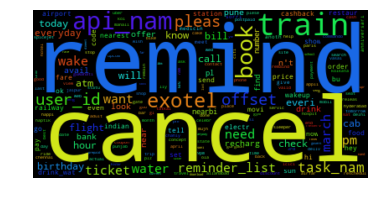

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(textall)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## WordCloud with lower max font size

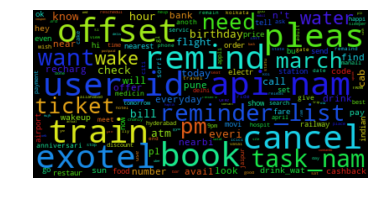

In [33]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(textall)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## WordCloud with additional stopwords

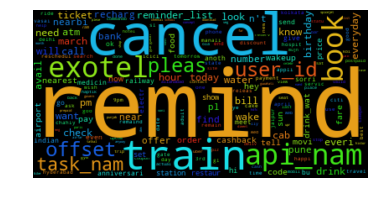

In [34]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

haptik_mask = np.array(Image.open("./images/haptik.png"))

stopwords = set(STOPWORDS)
stopwords.add("flight")

wc = WordCloud(max_words=2000, stopwords=stopwords)
# generate word cloud
wc = wc.generate(textall)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

## Term-Document Matrix: Representing text as numerical data

* **What is TDM**:  A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

Consider a corpus of documents and a dictionary of terms contain all the words that appear in the documents. The term-document matrix then is a two-dimensional matrix whose rows are the terms and columns are the documents, so each entry (i, j) represents the frequency of term i in document j. ([source](https://www.quora.com/What-is-a-term-document-matrix))

* **Why we care about TDM**:

    1. Content words that appear several times in a document are probably more meaningful than content words that appear just once.
    2. Words that appear more frequently in both our document as well other documenets (like "the", "a", "an" etc.) do not convey much meaning.
    2. Infrequently used words are likely to be more interesting than common words.

## Text Preprocessing using `sklearn`

`sklearn`'s `feature_extraction` module provides convenient API **CountVectorizer** to "convert raw text into a matrix of token counts" along with all the text processing steps we covered.

In [35]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [36]:
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:
# use TreeankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7f06aec189d0>>,
        vocabulary=None)

In [38]:
# remove English stop words
vect.set_params(stop_words='english')

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<class 'nltk.tokenize.treebank.TreebankWordTokenizer'>,
        vocabulary=None)

In [39]:
# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<class 'nltk.tokenize.treebank.TreebankWordTokenizer'>,
        vocabulary=None)

In [40]:
# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<class 'nltk.tokenize.treebank.TreebankWordTokenizer'>,
        vocabulary=None)

In [41]:
# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<class 'nltk.tokenize.treebank.TreebankWordTokenizer'>,
        vocabulary=None)

In [46]:
# learn the 'vocabulary' of the training data
vect.fit(X_train1)

# examine the fitted vocabulary
vect.get_feature_names()

[u'!',
 u'! !',
 u"! 'm",
 u'! ...',
 u'! :',
 u'! ?',
 u'! `',
 u'! check',
 u'! dude',
 u'! good',
 u'! help',
 u'! just',
 u'! let',
 u'! need',
 u'! sorry',
 u'! task',
 u'! thank',
 u'! thanks',
 u'! u',
 u'! want',
 u'! {',
 u'! \u263a',
 u'! \U0001f609',
 u'#',
 u'%',
 u'% ?',
 u'% cash',
 u'% cashback',
 u'% cb',
 u'% discount',
 u'&',
 u'& 3',
 u'& 5',
 u'& c',
 u'& installation',
 u'& return',
 u'& u',
 u"'",
 u"' )",
 u"' everyday",
 u"' fri",
 u"' mon",
 u"' sat",
 u"' sun",
 u"' thu",
 u"' wed",
 u"''",
 u"'' ''",
 u"'' ,",
 u"'' everyday",
 u"'' https",
 u"'' s",
 u"'d",
 u"'d like",
 u"'ll",
 u"'ll book",
 u"'ll buy",
 u"'ll c",
 u"'ll come",
 u"'ll inform",
 u"'ll let",
 u"'ll pay",
 u"'ll recharge",
 u"'ll remind",
 u"'ll tell",
 u"'ll try",
 u"'m",
 u"'m able",
 u"'m asking",
 u"'m bored",
 u"'m doing",
 u"'m facing",
 u"'m fine",
 u"'m getting",
 u"'m going",
 u"'m hungry",
 u"'m interested",
 u"'m looking",
 u"'m planning",
 u"'m receiving",
 u"'m saying",
 u"'m sea

Next, we transform training data into a 'document-term matrix'

In [47]:
simple_train_dtm = vect.transform(X_train1)
simple_train_dtm

<40659x21056 sparse matrix of type '<type 'numpy.int64'>'
	with 263128 stored elements in Compressed Sparse Row format>

In [48]:
test_dtm = vect.transform(X_test)

Next, we examine the vocabulary and document-term matrix together

In [36]:
# pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [49]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 221 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
# make class predictions for test_dtm
y_pred_class = nb.predict(test_dtm)

In [51]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.73209999999999997

In [52]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[2256,   27,   13,   24,   31,   53,   39,    2,  804],
       [  39,  514,    0,   29,   10,   67,   14,    0,  137],
       [   4,    5,  302,   25,    5,    0,    0,    1,   92],
       [  34,   24,    4,  480,   35,    8,    3,    7,   97],
       [ 146,   58,   14,   84, 1073,   44,   12,    6,  182],
       [  12,    7,    1,    5,    5,  257,    2,    0,   35],
       [ 104,    7,    2,    4,   11,   15,  604,    1,  111],
       [  18,    2,    1,   34,   22,    2,    1,  115,   25],
       [  21,   12,    2,   24,    3,    9,    1,    1, 1720]])

## Text processing using `gensim`

Install necessary packages: **gensim**  --> `pip install gensim`

## Getting Started with Term Document Matrix using `nltk` and `stop-words`

* Now we have *texts* - a tokenized, stopped and stemmed list of words from a single document
* Let’s fast forward and loop through all our documents and appended each one to *texts*
* So now *texts* is a list of lists, one list for each of our original documents

In [4]:
from nltk.tokenize import RegexpTokenizer, TreebankWordTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [6]:
tokenizer = TreebankWordTokenizer()

In [7]:
# create English stop words list
en_stop = get_stop_words('en')

In [8]:
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    

In [9]:
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

In [10]:
# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

In [11]:
# list for tokenized documents in loop
texts = []

In [23]:
# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

print(texts, "\n")

print("===========================================")

for line in texts:
    print(line)

([['brocolli', 'good', 'eat.', 'brother', u'like', 'eat', 'good', 'brocolli', ',', 'mother', '.'], ['mother', u'spend', 'lot', 'time', u'drive', 'brother', 'around', u'basebal', u'practic', '.'], ['health', u'expert', 'suggest', u'drive', 'may', u'caus', u'increas', 'tension', 'blood', u'pressur', '.'], ['often', 'feel', u'pressur', 'perform', 'well', 'school', ',', 'mother', 'never', u'seem', 'drive', 'brother', 'better', '.'], ['health', u'profession', 'say', 'brocolli', 'good', 'health', '.'], ['brocolli', 'good', 'eat.', 'brother', u'like', 'eat', 'good', 'brocolli', ',', 'mother', '.'], ['mother', u'spend', 'lot', 'time', u'drive', 'brother', 'around', u'basebal', u'practic', '.'], ['health', u'expert', 'suggest', u'drive', 'may', u'caus', u'increas', 'tension', 'blood', u'pressur', '.'], ['often', 'feel', u'pressur', 'perform', 'well', 'school', ',', 'mother', 'never', u'seem', 'drive', 'brother', 'better', '.'], ['health', u'profession', 'say', 'brocolli', 'good', 'health', '.']

## Topic Modeling

https://en.wikipedia.org/wiki/Topic_model
* A type of statistical model for discovering the abstract *topics* that occur in a collection of documents
* Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently:
    - *dog* and *bone* will appear more often in documents about dogs
    - *cat* and *meow* will appear in documents about cats
    - *the* and *is* will appear equally in both
* A document typically concerns multiple topics in different proportions
    - In a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words
* The *topics* produced by topic modeling techniques are clusters of similar words

## Latent Dirichlet Allocation

https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
* Latent Dirichlet Allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar
* For example, if observations are words collected into documents, then
    - each document is a mixture of a small number of topics, and 
    - each word's creation is attributable to one of the document's topics

## LDA Model

* LDA assumes documents are produced from a mixture of topics.
* Those topics then generate words based on their probability distribution, like the ones in our walkthrough model.
* In other words, LDA assumes a document is made from the following steps:
    - Determine the number of words in a document.
    - Let’s say our document has 6 words.
    - Determine the mixture of topics in that document
        - For example, the document might contain 1/2 the topic “health” and 1/2 the topic “vegetables.”
    - Using each topic’s multinomial distribution, output words to fill the document’s word slots.
    - In our example, the “health” topic is 1/2 our document, or 3 words.
    - The “health” topic might have the word “diet” at 20% probability or “exercise” at 15%, so it will fill the document word slots based on those probabilities.
    * Given this assumption of how documents are created, LDA backtracks and tries to figure out what topics would create those documents in the first place.


* To generate an LDA model, we need to understand how frequently each term occurs within each document



To do that, we need to construct a document-term matrix with *gensim*

In [17]:
from gensim import corpora, models

dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(35 unique tokens: [u'often', u'feel', u'profession', u'drive', u'say']...)


* The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics
* To see each token’s unique integer id, try -

In [18]:
print(dictionary.token2id)

{u'often': 26, u'feel': 27, u'profession': 34, u'drive': 11, u'say': 33, u'pressur': 21, u'basebal': 10, u'seem': 32, u'better': 30, u'expert': 17, u'perform': 31, u'suggest': 19, u',': 3, u'.': 7, u'eat.': 5, u'health': 22, u'lot': 12, u'tension': 16, u'good': 1, u'around': 9, u'may': 18, u'mother': 6, u'school': 25, u'blood': 23, u'never': 28, u'increas': 24, u'eat': 8, u'practic': 15, u'brocolli': 0, u'like': 2, u'well': 29, u'brother': 4, u'caus': 20, u'time': 13, u'spend': 14}


Next, our dictionary must be converted into a [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) -

In [19]:
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(4, 1), (6, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(7, 1), (11, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(3, 1), (4, 1), (6, 1), (7, 1), (11, 1), (21, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(0, 1), (1, 1), (7, 1), (22, 2), (33, 1), (34, 1)], [(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(4, 1), (6, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(7, 1), (11, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(3, 1), (4, 1), (6, 1), (7, 1), (11, 1), (21, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(0, 1), (1, 1), (7, 1), (22, 2), (33, 1), (34, 1)]]


In [20]:
print(corpus[0])

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [21]:
print(corpus[1])

[(4, 1), (6, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [26]:
for line in corpus:
    print(line)

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
[(4, 1), (6, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
[(7, 1), (11, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]
[(3, 1), (4, 1), (6, 1), (7, 1), (11, 1), (21, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]
[(0, 1), (1, 1), (7, 1), (22, 2), (33, 1), (34, 1)]
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
[(4, 1), (6, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
[(7, 1), (11, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]
[(3, 1), (4, 1), (6, 1), (7, 1), (11, 1), (21, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]
[(0, 1), (1, 1), (7, 1), (22, 2), (33, 1), (34, 1)]


* The doc2bow() function converts dictionary into a bag-of-words
* The result, *corpus*, is a list of vectors equal to the number of documents
* In each document vector is a series of tuples
* The tuples are (term ID, term frequency) pairs
* This includes terms that actually occur - terms that do not occur in a document will not appear in that document’s vector

Looking at the data above, please answer the following:
* How many times does *basebal* occur in *doc_a*?
* How many times does *basebal* occur in *doc_b*?
* How many times does *health* occur in *doc_e*?
* Give an example of a word that occurs in *doc_a* but doesn't occur in *doc_b*.
* How many times does *brother* occur in all the documents?

# The LDA Model

*corpus* is a (sparse) document-term matrix and now we’re ready to generate an LDA model

In [27]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

https://radimrehurek.com/gensim/models/ldamodel.html
* num_topics
    - required
    - An LDA model requires the user to determine how many topics should be generated
    - Our document set is small, so we’re only asking for three topics
* id2word
    - required
    - The LdaModel class requires our previous dictionary to map ids to strings
* passes
    - optional
    - The number of laps the model will take through corpus
    - The greater the number of passes, the more accurate the model will be
    - A lot of passes can be slow on a very large corpus.

In [28]:
print(ldamodel)

LdaModel(num_terms=35, num_topics=3, decay=0.5, chunksize=2000)


In [29]:
print(ldamodel.print_topics())

[(0, u'0.084*"." + 0.063*"mother" + 0.063*"brother" + 0.063*"drive" + 0.061*"health" + 0.034*"perform" + 0.034*"seem" + 0.034*"school" + 0.034*"never" + 0.034*"well"'), (1, u'0.070*"health" + 0.069*"." + 0.069*"pressur" + 0.069*"drive" + 0.069*"tension" + 0.069*"caus" + 0.069*"blood" + 0.069*"expert" + 0.069*"may" + 0.069*"increas"'), (2, u'0.163*"brocolli" + 0.163*"good" + 0.076*"." + 0.061*"," + 0.061*"brother" + 0.061*"mother" + 0.061*"eat." + 0.061*"like" + 0.061*"eat" + 0.010*"say"')]


In [30]:
print(ldamodel.print_topics(num_topics=2))

[(2, u'0.163*"brocolli" + 0.163*"good" + 0.076*"." + 0.061*"," + 0.061*"brother" + 0.061*"mother" + 0.061*"eat." + 0.061*"like" + 0.061*"eat" + 0.010*"say"'), (0, u'0.084*"." + 0.063*"mother" + 0.063*"brother" + 0.063*"drive" + 0.061*"health" + 0.034*"perform" + 0.034*"seem" + 0.034*"school" + 0.034*"never" + 0.034*"well"')]


In [31]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, u'0.084*"." + 0.063*"mother" + 0.063*"brother"'), (1, u'0.070*"health" + 0.069*"." + 0.069*"pressur"'), (2, u'0.163*"brocolli" + 0.163*"good" + 0.076*"."')]


* Each generated topic is separated by a comma
* Within each topic are the three most probable words to appear in that topic

Let's now look at a topic in detail - 

In [32]:
print(ldamodel.print_topic(topicno=0))

0.084*"." + 0.063*"mother" + 0.063*"brother" + 0.063*"drive" + 0.061*"health" + 0.034*"perform" + 0.034*"seem" + 0.034*"school" + 0.034*"never" + 0.034*"well"


In [33]:
print(ldamodel.print_topic(topicno=1))

0.070*"health" + 0.069*"." + 0.069*"pressur" + 0.069*"drive" + 0.069*"tension" + 0.069*"caus" + 0.069*"blood" + 0.069*"expert" + 0.069*"may" + 0.069*"increas"


In [34]:
print(ldamodel.print_topic(topicno=2))

0.163*"brocolli" + 0.163*"good" + 0.076*"." + 0.061*"," + 0.061*"brother" + 0.061*"mother" + 0.061*"eat." + 0.061*"like" + 0.061*"eat" + 0.010*"say"


## Refine the model

In [36]:
for line in ldamodel.print_topics(num_topics=3, num_words=3):
    print(line)

(0, u'0.084*"." + 0.063*"mother" + 0.063*"brother"')
(1, u'0.070*"health" + 0.069*"." + 0.069*"pressur"')
(2, u'0.163*"brocolli" + 0.163*"good" + 0.076*"."')


* Even though our document set is small the model is reasonable
* Third Topic - health, brocolli and good make sense together

In [41]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [37]:
for line in ldamodel.print_topics(num_topics=2, num_words=4):
    print(line)

(2, u'0.163*"brocolli" + 0.163*"good" + 0.076*"." + 0.061*","')
(1, u'0.070*"health" + 0.069*"." + 0.069*"pressur" + 0.069*"drive"')


Let's try it with more passes

In [42]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=200)

In [43]:
for line in ldamodel.print_topics(num_topics=2, num_words=4):
    print(line)

(0, u'0.070*"mother" + 0.070*"brother" + 0.069*"drive" + 0.069*"."')
(1, u'0.086*"health" + 0.086*"brocolli" + 0.086*"good" + 0.086*"."')
